In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib notebook

plt.style.use('bmh')

In [40]:
df = pd.read_json('../Jas_specificity/data/images/results.json', orient='index')
df.head()

,Captions,maxScore,meanScore,minScore
img_313.jpg,[a small wooden bench sitting in front of a ho...,0.978221,0.556347,0.055623
img_210.jpg,"[a house with a tree and a house , a small hou...",0.970742,0.743652,0.277409
img_473.jpg,"[a train is on the tracks in a dark room , a t...",0.923457,0.496305,0.043240
img_528.jpg,"[a blue and white tub sitting in a building , ...",0.953146,0.518350,0.077912
img_652.jpg,[a herd of giraffes standing around a fenced i...,0.952986,0.622603,0.362509


In [41]:
for captions in df.Captions:
    for i, caption in enumerate(captions):
        col_name = 'caption_' + str(i+1)
        df[col_name] = caption

In [42]:
df.drop('Captions', axis=1, inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, img_313.jpg to img_365.jpg
Data columns (total 11 columns):
maxScore     888 non-null float64
meanScore    888 non-null float64
minScore     888 non-null float64
caption_1    888 non-null object
caption_2    888 non-null object
caption_3    888 non-null object
caption_4    888 non-null object
caption_5    888 non-null object
caption_6    888 non-null object
caption_7    888 non-null object
caption_8    888 non-null object
dtypes: float64(3), object(8)
memory usage: 83.2+ KB


count    888.000000
mean       0.944176
std        0.042947
min        0.692119
25%        0.929286
50%        0.957296
75%        0.973136
max        0.993060
Name: maxScore, dtype: float64


<IPython.core.display.Javascript object>


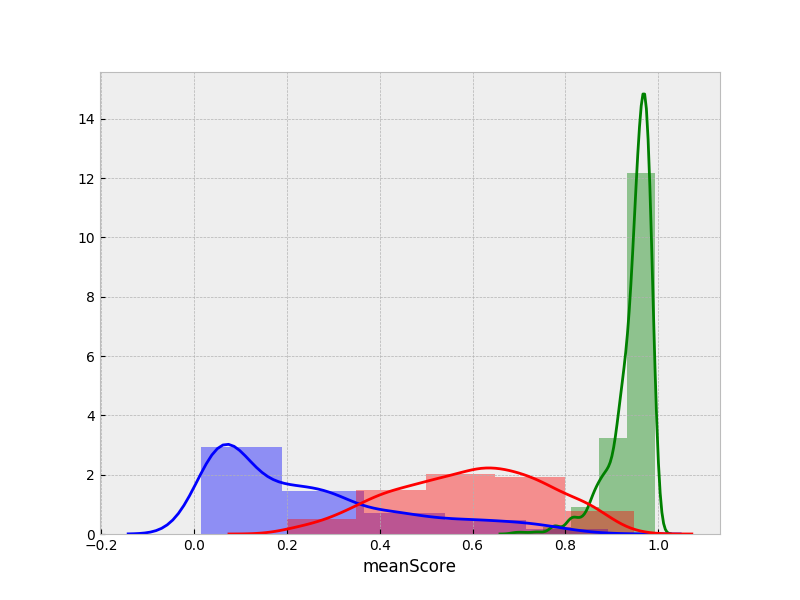

In [44]:
print(df['maxScore'].describe())
plt.figure(figsize=(8, 6))
bins = 5
sns.distplot(df['maxScore'], color='g', bins=bins, hist_kws={'alpha': 0.4});
sns.distplot(df['minScore'], color='b', bins=bins, hist_kws={'alpha': 0.4});
sns.distplot(df['meanScore'], color='r', bins=bins, hist_kws={'alpha': 0.4});

In [50]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,maxScore,meanScore,minScore
img_313.jpg,0.978221,0.556347,0.055623
img_210.jpg,0.970742,0.743652,0.277409
img_473.jpg,0.923457,0.496305,0.043240
img_528.jpg,0.953146,0.518350,0.077912
img_652.jpg,0.952986,0.622603,0.362509


<IPython.core.display.Javascript object>


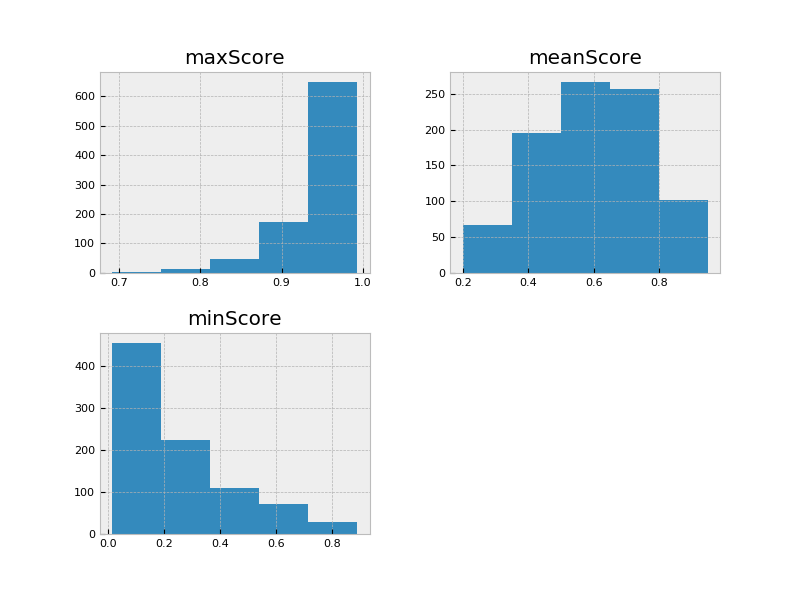

In [51]:
df_num.hist(figsize=(8, 6), bins=5, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

<IPython.core.display.Javascript object>


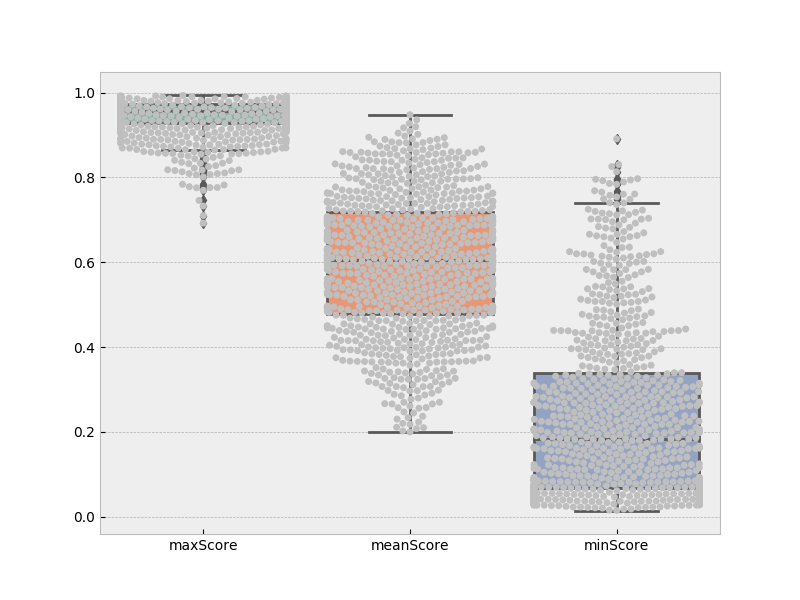

In [61]:
plt.figure(figsize = (8, 6))
ax = sns.boxplot(data=df_num, orient="v", palette="Set2")
ax = sns.swarmplot(data=df_num, color=".75")

<IPython.core.display.Javascript object>


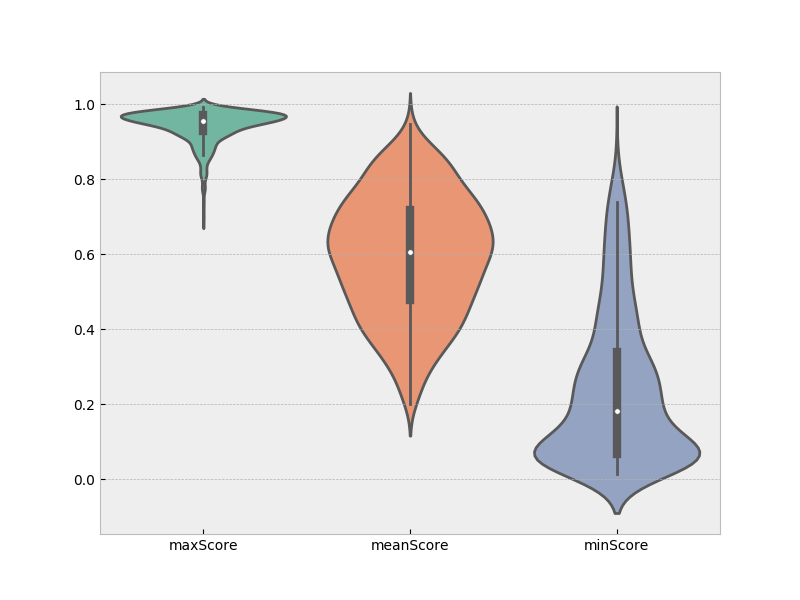

In [60]:
plt.figure(figsize = (8, 6))
bx = sns.violinplot(data=df_num, palette="Set2", split=True, scale="count")